emillia intan permatasari

202201062

SISTEM INFORMASI B

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

dataset = pd.read_csv('/content/heart.csv')

In [2]:
print(dataset)

     Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
0     40   M           ATA        140          289          0     Normal   
1     49   F           NAP        160          180          0     Normal   
2     37   M           ATA        130          283          0         ST   
3     48   F           ASY        138          214          0     Normal   
4     54   M           NAP        150          195          0     Normal   
..   ...  ..           ...        ...          ...        ...        ...   
913   45   M            TA        110          264          0     Normal   
914   68   M           ASY        144          193          1     Normal   
915   57   M           ASY        130          131          0     Normal   
916   57   F           ATA        130          236          0        LVH   
917   38   M           NAP        138          175          0     Normal   

     MaxHR ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0      172              N  

In [3]:
# Periksa data yang hilang
print("Missing values:\n", dataset.isnull().sum())

Missing values:
 Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64


In [4]:
# mengubah variabel kategorikal ke numerik pada kolom berikut
dataset = pd.get_dummies(dataset, columns=['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'])

# memisahkan fitur dan target
X = dataset.drop('HeartDisease', axis=1) #fitur
y = dataset['HeartDisease'] # target

# Standarisasi data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# DataFrame dari komponen PCA
pca_df = pd.DataFrame(data=X_pca, columns=[f'PC{i+1}' for i in range(X_pca.shape[1])])
pca_df['HeartDisease'] = y

# Tampilkan explained variance ratio
print("Explained variance ratio:", pca.explained_variance_ratio_)

# Analisis fitur penting
important_features = pd.DataFrame({
    'Feature': X.columns,
    'PC1_importance': np.abs(pca.components_[0]),
    'PC2_importance': np.abs(pca.components_[1])
}).sort_values('PC1_importance', ascending=False)

print("Top features contributing to PC1:")
print(important_features.head(10))

Explained variance ratio: [2.22921302e-01 1.01601493e-01 9.09165398e-02 7.21636385e-02
 7.14780335e-02 6.46580338e-02 6.04167980e-02 5.69179022e-02
 5.10628477e-02 4.50599549e-02 4.14049681e-02 4.02412373e-02
 3.14929458e-02 2.77201335e-02 2.19441717e-02 3.23029179e-17
 5.90831249e-18 0.00000000e+00 0.00000000e+00 0.00000000e+00]
Top features contributing to PC1:
              Feature  PC1_importance  PC2_importance
15   ExerciseAngina_N        0.367489        0.051270
16   ExerciseAngina_Y        0.367489        0.051270
19        ST_Slope_Up        0.355356        0.098881
8   ChestPainType_ASY        0.313172        0.042609
18      ST_Slope_Flat        0.300044        0.079196
4               MaxHR        0.282808        0.072982
5             Oldpeak        0.266394        0.171352
9   ChestPainType_ATA        0.254931        0.038135
0                 Age        0.209436        0.192410
6               Sex_F        0.194033        0.486899


In [5]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Gunakan komponen utama yang telah dihasilkan sebelumnya
# X_pca sudah berisi hasil transformasi PCA
# y adalah target variabel (HeartDisease)

# 5 komponen dengan presentase tertinggi di pilih untuk mewakili mayoritas data
n_components = 5
X_reduced = X_pca[:, :n_components]

# Split data menjadi training dan testing set
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.3, random_state=42)

In [6]:
print(X_train)

[[ 1.38524418 -1.59084691  0.11887532 -0.34677167 -0.66045923]
 [-2.86284335 -1.44660899 -0.16460547  0.65222871 -0.97972308]
 [-1.82313244  0.55972191 -1.69357573 -0.23695214  2.25757379]
 ...
 [-0.76586002 -0.81018777  0.85142038 -0.76144286 -1.46061607]
 [-1.51278276 -0.53281438 -1.57139516  1.91292381 -1.7142664 ]
 [ 0.51787845  1.9381296   2.84564879  0.2053759   0.24123573]]


In [7]:
print(X_test)

[[ 3.52885678  1.24916522  1.22388877  1.16562511 -0.81804124]
 [ 0.82378558 -0.04378957  0.61376802 -1.4354096   2.16069468]
 [-2.03078389 -0.13804143 -2.31474387  2.60067287  0.57901081]
 ...
 [-2.79154381  1.03664773 -1.47554331 -1.26054133 -1.73660163]
 [-2.06625553 -0.99089908  0.46283371  0.80628809  2.45235419]
 [ 3.43000849  1.49797338  1.15989058  0.33600875  1.22718347]]


In [8]:
print(y_train)

712    1
477    1
409    1
448    1
838    1
      ..
106    0
270    0
860    1
435    0
102    1
Name: HeartDisease, Length: 642, dtype: int64


In [9]:
print(y_test)

668    0
30     1
377    1
535    1
807    0
      ..
133    1
813    0
734    1
360    1
875    0
Name: HeartDisease, Length: 276, dtype: int64


In [10]:
# PCA ke 2 dimensi
pca = PCA(n_components=2)
X_train_2d = pca.fit_transform(X_train)
X_test_2d = pca.transform(X_test)

In [15]:
from sklearn.neighbors import KNeighborsClassifier

# Model Naive Bayes di data hasil PCA
nb_2d = KNeighborsClassifier()
nb_2d.fit(X_train_2d, y_train)

y_pred = nb_2d.predict(X_test_2d)

In [16]:
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Confusion Matrix:
[[ 95  17]
 [ 31 133]]


<ipython-input-17-1ff1c45400f4>:28: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x_set[y_set == j, 0],


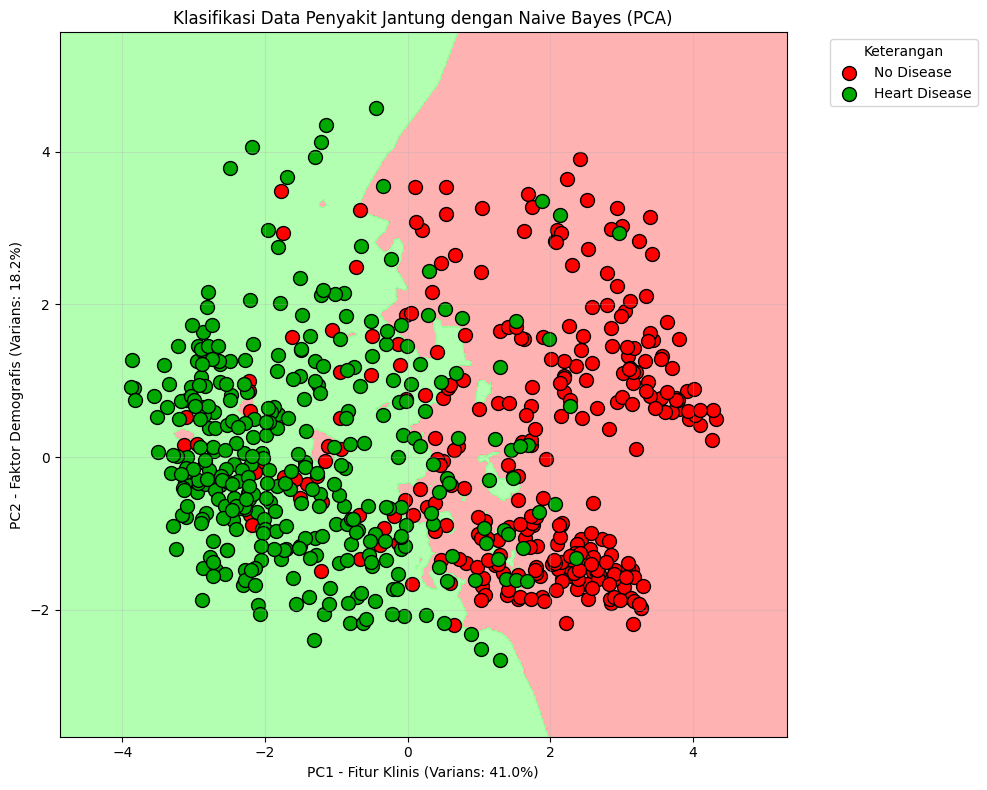

In [17]:
from matplotlib.colors import ListedColormap

# Gunakan hasil PCA 2D sebelumnya
x_set = X_train  # Data training dari PCA
y_set = y_train # Label training

# Buat mesh grid
x1, x2 = np.meshgrid(np.arange(start = x_set[:, 0].min() - 1,
                               stop = x_set[:, 0].max() + 1,
                               step = 0.01),
                     np.arange(start = x_set[:, 1].min() - 1,
                               stop = x_set[:, 1].max() + 1,
                               step = 0.01))

# Plot decision boundary
plt.figure(figsize=(10, 8))
plt.contourf(x1, x2,
             nb_2d.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),
             alpha = 0.75,
             cmap = ListedColormap(('#FF9999', '#99FF99')))

# Batas plot
plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())

# Plot data points
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set == j, 0],
                x_set[y_set == j, 1],
                c = ListedColormap(('#FF0000', '#00AA00'))(i),
                label = 'No Disease' if j == 0 else 'Heart Disease',
                edgecolor='black',
                s=100)

# Tambahkan judul dan label
plt.title('Klasifikasi Data Penyakit Jantung dengan Naive Bayes (PCA)')
plt.xlabel('PC1 - Fitur Klinis (Varians: {:.1f}%)'.format(pca.explained_variance_ratio_[0]*100))
plt.ylabel('PC2 - Faktor Demografis (Varians: {:.1f}%)'.format(pca.explained_variance_ratio_[1]*100))
plt.legend(title='Keterangan', bbox_to_anchor=(1.05, 1), loc='upper left')

# Tambahkan grid
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

<ipython-input-18-e273ebe148c8>:15: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x_set[y_set == j, 0],


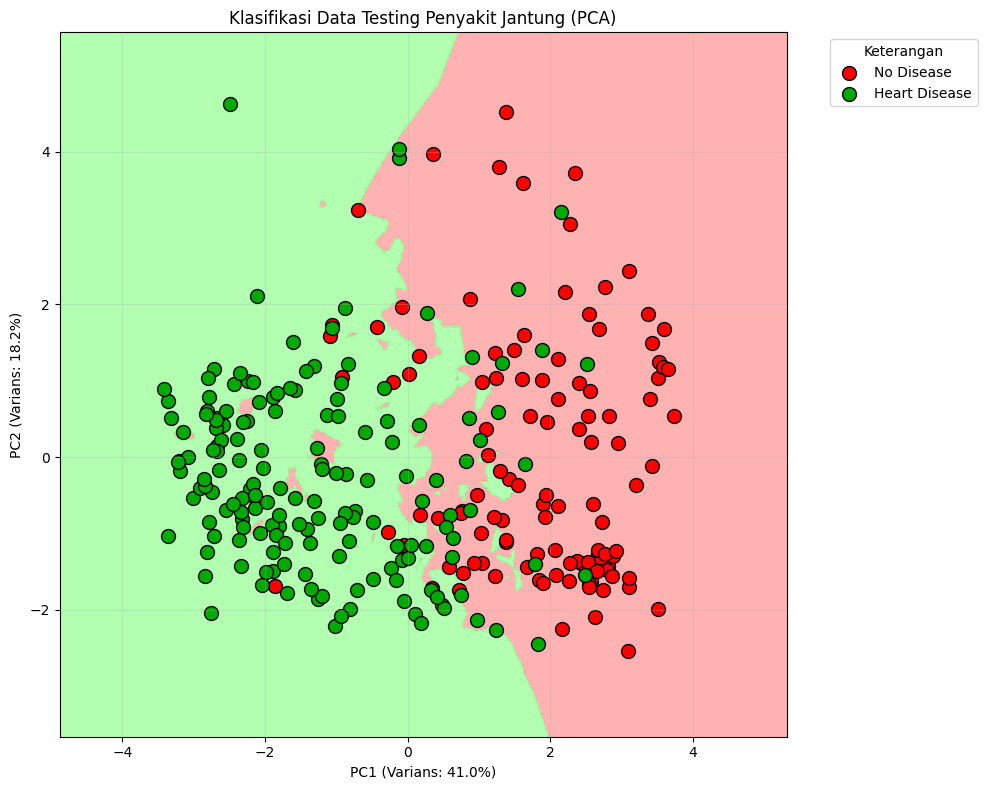

In [18]:
# Gunakan data testing
x_set = X_test
y_set = y_test

plt.figure(figsize=(10, 8))
plt.contourf(x1, x2,
             nb_2d.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),
             alpha = 0.75,
             cmap = ListedColormap(('#FF9999', '#99FF99')))

plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set == j, 0],
                x_set[y_set == j, 1],
                 c = ListedColormap(('#FF0000', '#00AA00'))(i),
                label = 'No Disease' if j == 0 else 'Heart Disease',
                edgecolor='black',
                s=100)

plt.title('Klasifikasi Data Testing Penyakit Jantung (PCA)')
plt.xlabel('PC1 (Varians: {:.1f}%)'.format(pca.explained_variance_ratio_[0]*100))
plt.ylabel('PC2 (Varians: {:.1f}%)'.format(pca.explained_variance_ratio_[1]*100))
plt.legend(title='Keterangan', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

saya menggunakan PCA untuk Mentransformasi fitur-fitur terkorelasi menjadi komponen independen, juga membantu melihat komponen data mana yang memiliki presentase tertinggi untuk mewakili mayoritas data

In [24]:
from sklearn.metrics import accuracy_score # melakukan evaluasi dengan accuracy score
print(accuracy_score(y_test, y_pred)) # menampilkan accuracy score dengan data testing dan data prediksi
print ("tingkat akurasi : ", accuracy_score(y_test, y_pred)*100, "%") # menampilkan tingkat akurasi dengan data testing dan data prediksi

0.8260869565217391
tingkat akurasi :  82.6086956521739 %


akurasi data yang dihasilkan dari metode naivebayes : 84.05797101449275 %

sedangkan akurasi data yang dihasilkan metode KNN : 82.6086956521739 %